In [1]:
#IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# LOADING DATA
data=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [3]:
# CHECKING DATA STRUCTURE
data.head()
print("COLUMNS:",data.columns)
print("OVERVIEW OF DATA:",data.info())
print("DESCRIPTIVE STATISTIICS OF DATA:",data.describe())

COLUMNS: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
OVERVIEW OF DATA: None
DESCRIPTIVE STATISTIICS OF DATA:        PassengerId    Surv

In [4]:
#CHECKING FOR MISSING VALUES
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#CLEANING DATA
data.drop(['Cabin','Ticket', 'Name'], axis=1,inplace=True,errors='ignore')

# Filling missing Ages with median
data['Age'] = data['Age'].fillna(data['Age'].median())

# Fill Embarked with most common value
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])


In [6]:
data['Sex']=data['Sex'].map({'male':0,'female':1})

In [7]:
data.isnull().sum()
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,S
887,888,1,1,1,19.0,0,0,30.0000,S
888,889,0,3,1,28.0,1,2,23.4500,S
889,890,1,1,0,26.0,0,0,30.0000,C


In [8]:
#FEATURE SELECTION
y=data['Survived'] #DEPENDENT VARIABLE
X = data.drop(['Survived', 'Embarked'], axis=1) #INDEPENDENT VARIABLE

In [9]:
#SPLITTING DATA
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [10]:
#TRAINING LOGISTIC REGRESSION MODEL
log_model=LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)
y_pred_log=log_model.predict(X_test)

In [11]:
#EVALUATING MODEL
print("Logistic Regression")
print(classification_report(y_test, y_pred_log))

Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       117
           1       0.76      0.77      0.77        62

    accuracy                           0.84       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



In [12]:
#TRAINING RANDOM FOREST MODEL
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [13]:
#EVALUATING MODEL
print("Random Forest")
print(classification_report(y_test, y_pred_rf))

Random Forest
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       117
           1       0.81      0.82      0.82        62

    accuracy                           0.87       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179



In [14]:
#TRAINING XGBOOST MODEL
xgb_model = XGBClassifier( eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [15]:
#EVALUATING MODEL
print("XGBoost")
print(classification_report(y_test, y_pred_xgb))

XGBoost
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       117
           1       0.78      0.84      0.81        62

    accuracy                           0.86       179
   macro avg       0.84      0.86      0.85       179
weighted avg       0.86      0.86      0.86       179



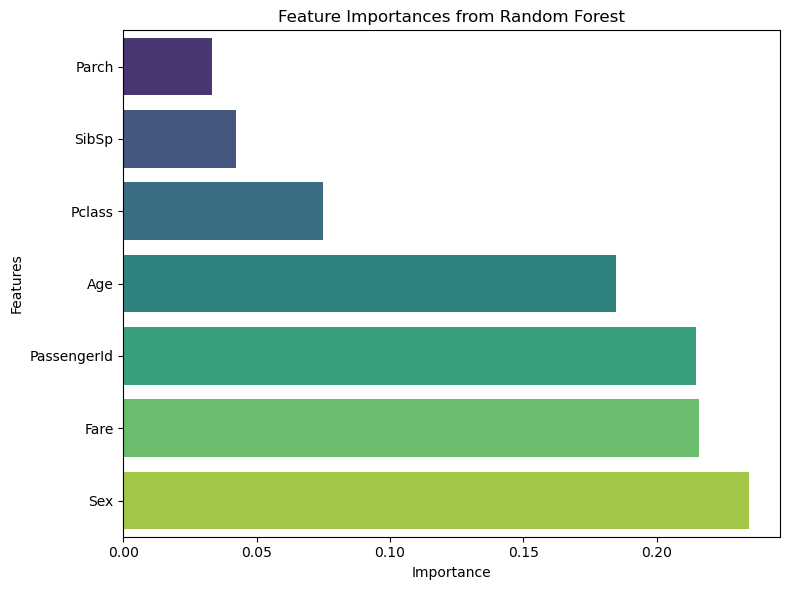

In [43]:
#Model Explainability
importances = rf_model.feature_importances_
feature_names = X_train.columns 

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=feat_imp, y=feat_imp.index, hue=feat_imp.index, palette="viridis", legend=False)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

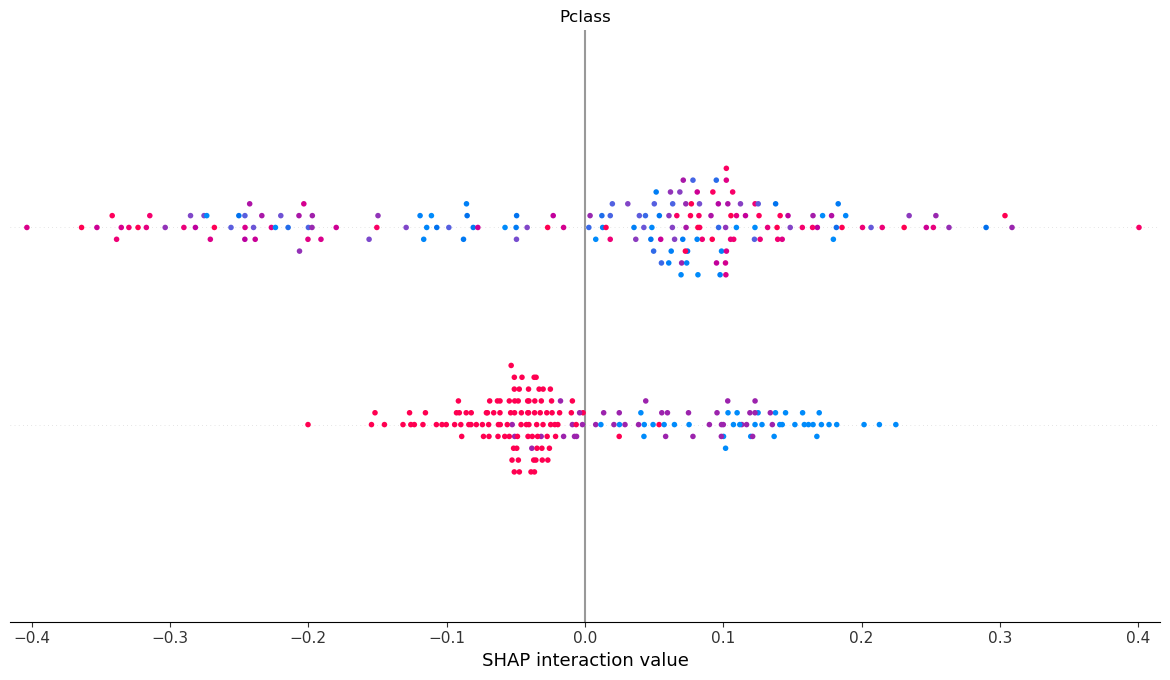

In [63]:
import shap

# Initialize the SHAP Tree Explainer
explainer = shap.TreeExplainer(rf_model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test.values)

shap.summary_plot(shap_values,X_test)